#### Importing Libraries

In [27]:
# ignore warning
import warnings
warnings.filterwarnings('ignore')

# Import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score

#### Importing Data

In [3]:
df = pd.read_csv(r'Telecoms Company data.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


#### Data Cleaning

In [4]:
# We do not need customerID

data = df.drop('customerID', axis = 1)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [5]:
# totalCharges is an object instead of a numerical dtype

data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')
data['TotalCharges'].dtype

dtype('float64')

In [6]:
# Let's check for nulls in the dataframe

data.isna().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [7]:
# We have 11 rows with no totalCharges. 11 rows out of 7043 is not a big deal, so we can drop those rows.
data = data.dropna()
data.shape

(7032, 20)

In [8]:
#Lets look at the unique values of the categorical fields in the dataframe.

for column in data:
    if data[column].dtype == 'object':
        print(f'{column}: {data[column].unique()}')

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


In [9]:
# For some fiels like InternetService, MultipleLines, etc, we see categories like 'No Internet Service' or 'No phone service'. We should replace them with 'No'"Telecoms Company data.csv"

data = data.replace(['No internet service', 'No phone service'], 'No')

for column in data:
    if data[column].dtype == 'object':
        print(f'{column}: {data[column].unique()}')

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes']
OnlineBackup: ['Yes' 'No']
DeviceProtection: ['No' 'Yes']
TechSupport: ['No' 'Yes']
StreamingTV: ['No' 'Yes']
StreamingMovies: ['No' 'Yes']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


#### Data Exploration

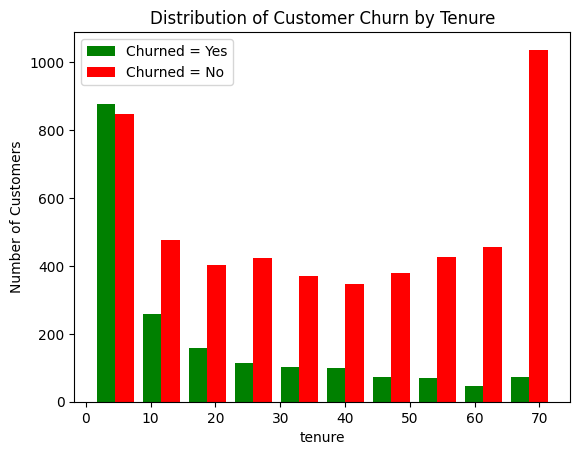

In [10]:
# Using the tenure field, let's see how many of the Loyal customers (people with long tenures) are leaving.

Not_churned = data[data['Churn'] == 'No'].tenure
Churned = data[data['Churn'] == 'Yes'].tenure

plt.xlabel('tenure')
plt.ylabel('Number of Customers')
plt.title('Distribution of Customer Churn by Tenure')
plt.hist(
    [Churned, Not_churned], 
    color=['g', 'r'], 
    label=['Churned = Yes', 'Churned = No']
    )
plt.legend();

In [11]:
# Its evident thet tenure has an effect on churn. The ratio of those customers who churn to those customers who do not churn in the first bin (0 - 10 months) is almost 1 : 1.
# And that ratio decreases as tenure increases

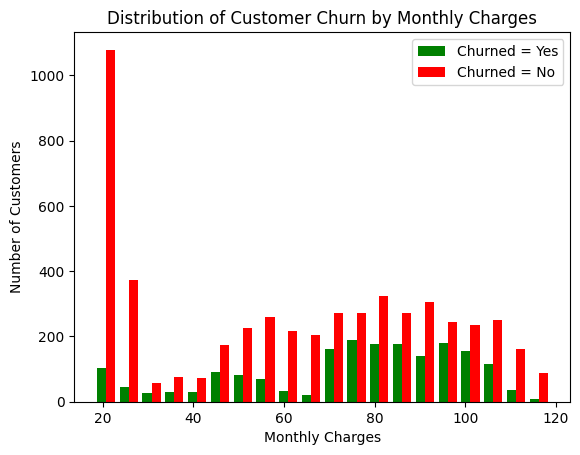

In [12]:
# let's also see if monthly charge hgas a effect on churn

not_churned = data[data['Churn'] == 'No'].MonthlyCharges
churned = data[data['Churn'] == 'Yes'].MonthlyCharges

plt.xlabel('Monthly Charges')
plt.ylabel('Number of Customers')
plt.title('Distribution of Customer Churn by Monthly Charges')
plt.hist(
    [churned, not_churned],
    color= ['g', 'r'],
    label=['Churned = Yes', 'Churned = No'],
    bins=20
    )
plt.legend();

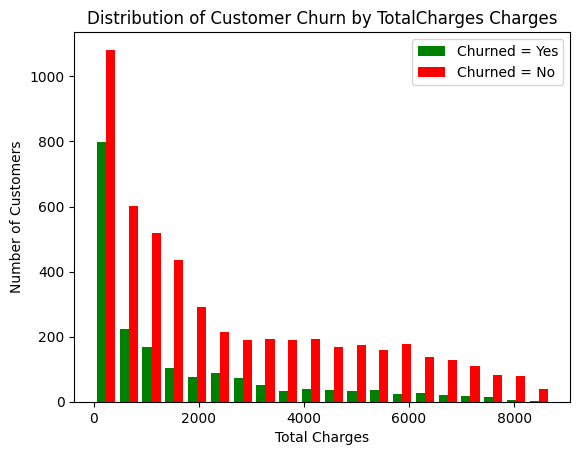

In [13]:
# let's also see if total charge has a effect on churn

not_churned = data[data['Churn'] == 'No'].TotalCharges
churned = data[data['Churn'] == 'Yes'].TotalCharges

plt.xlabel('Total Charges')
plt.ylabel('Number of Customers')
plt.title('Distribution of Customer Churn by TotalCharges Charges')
plt.hist(
    [churned, not_churned],
    color= ['g', 'r'],
    label=['Churned = Yes', 'Churned = No'],
    bins=20
    )
plt.legend();

In [14]:
# Its weird that the customers with the lowest amount paid in total charges have the highest churn rate

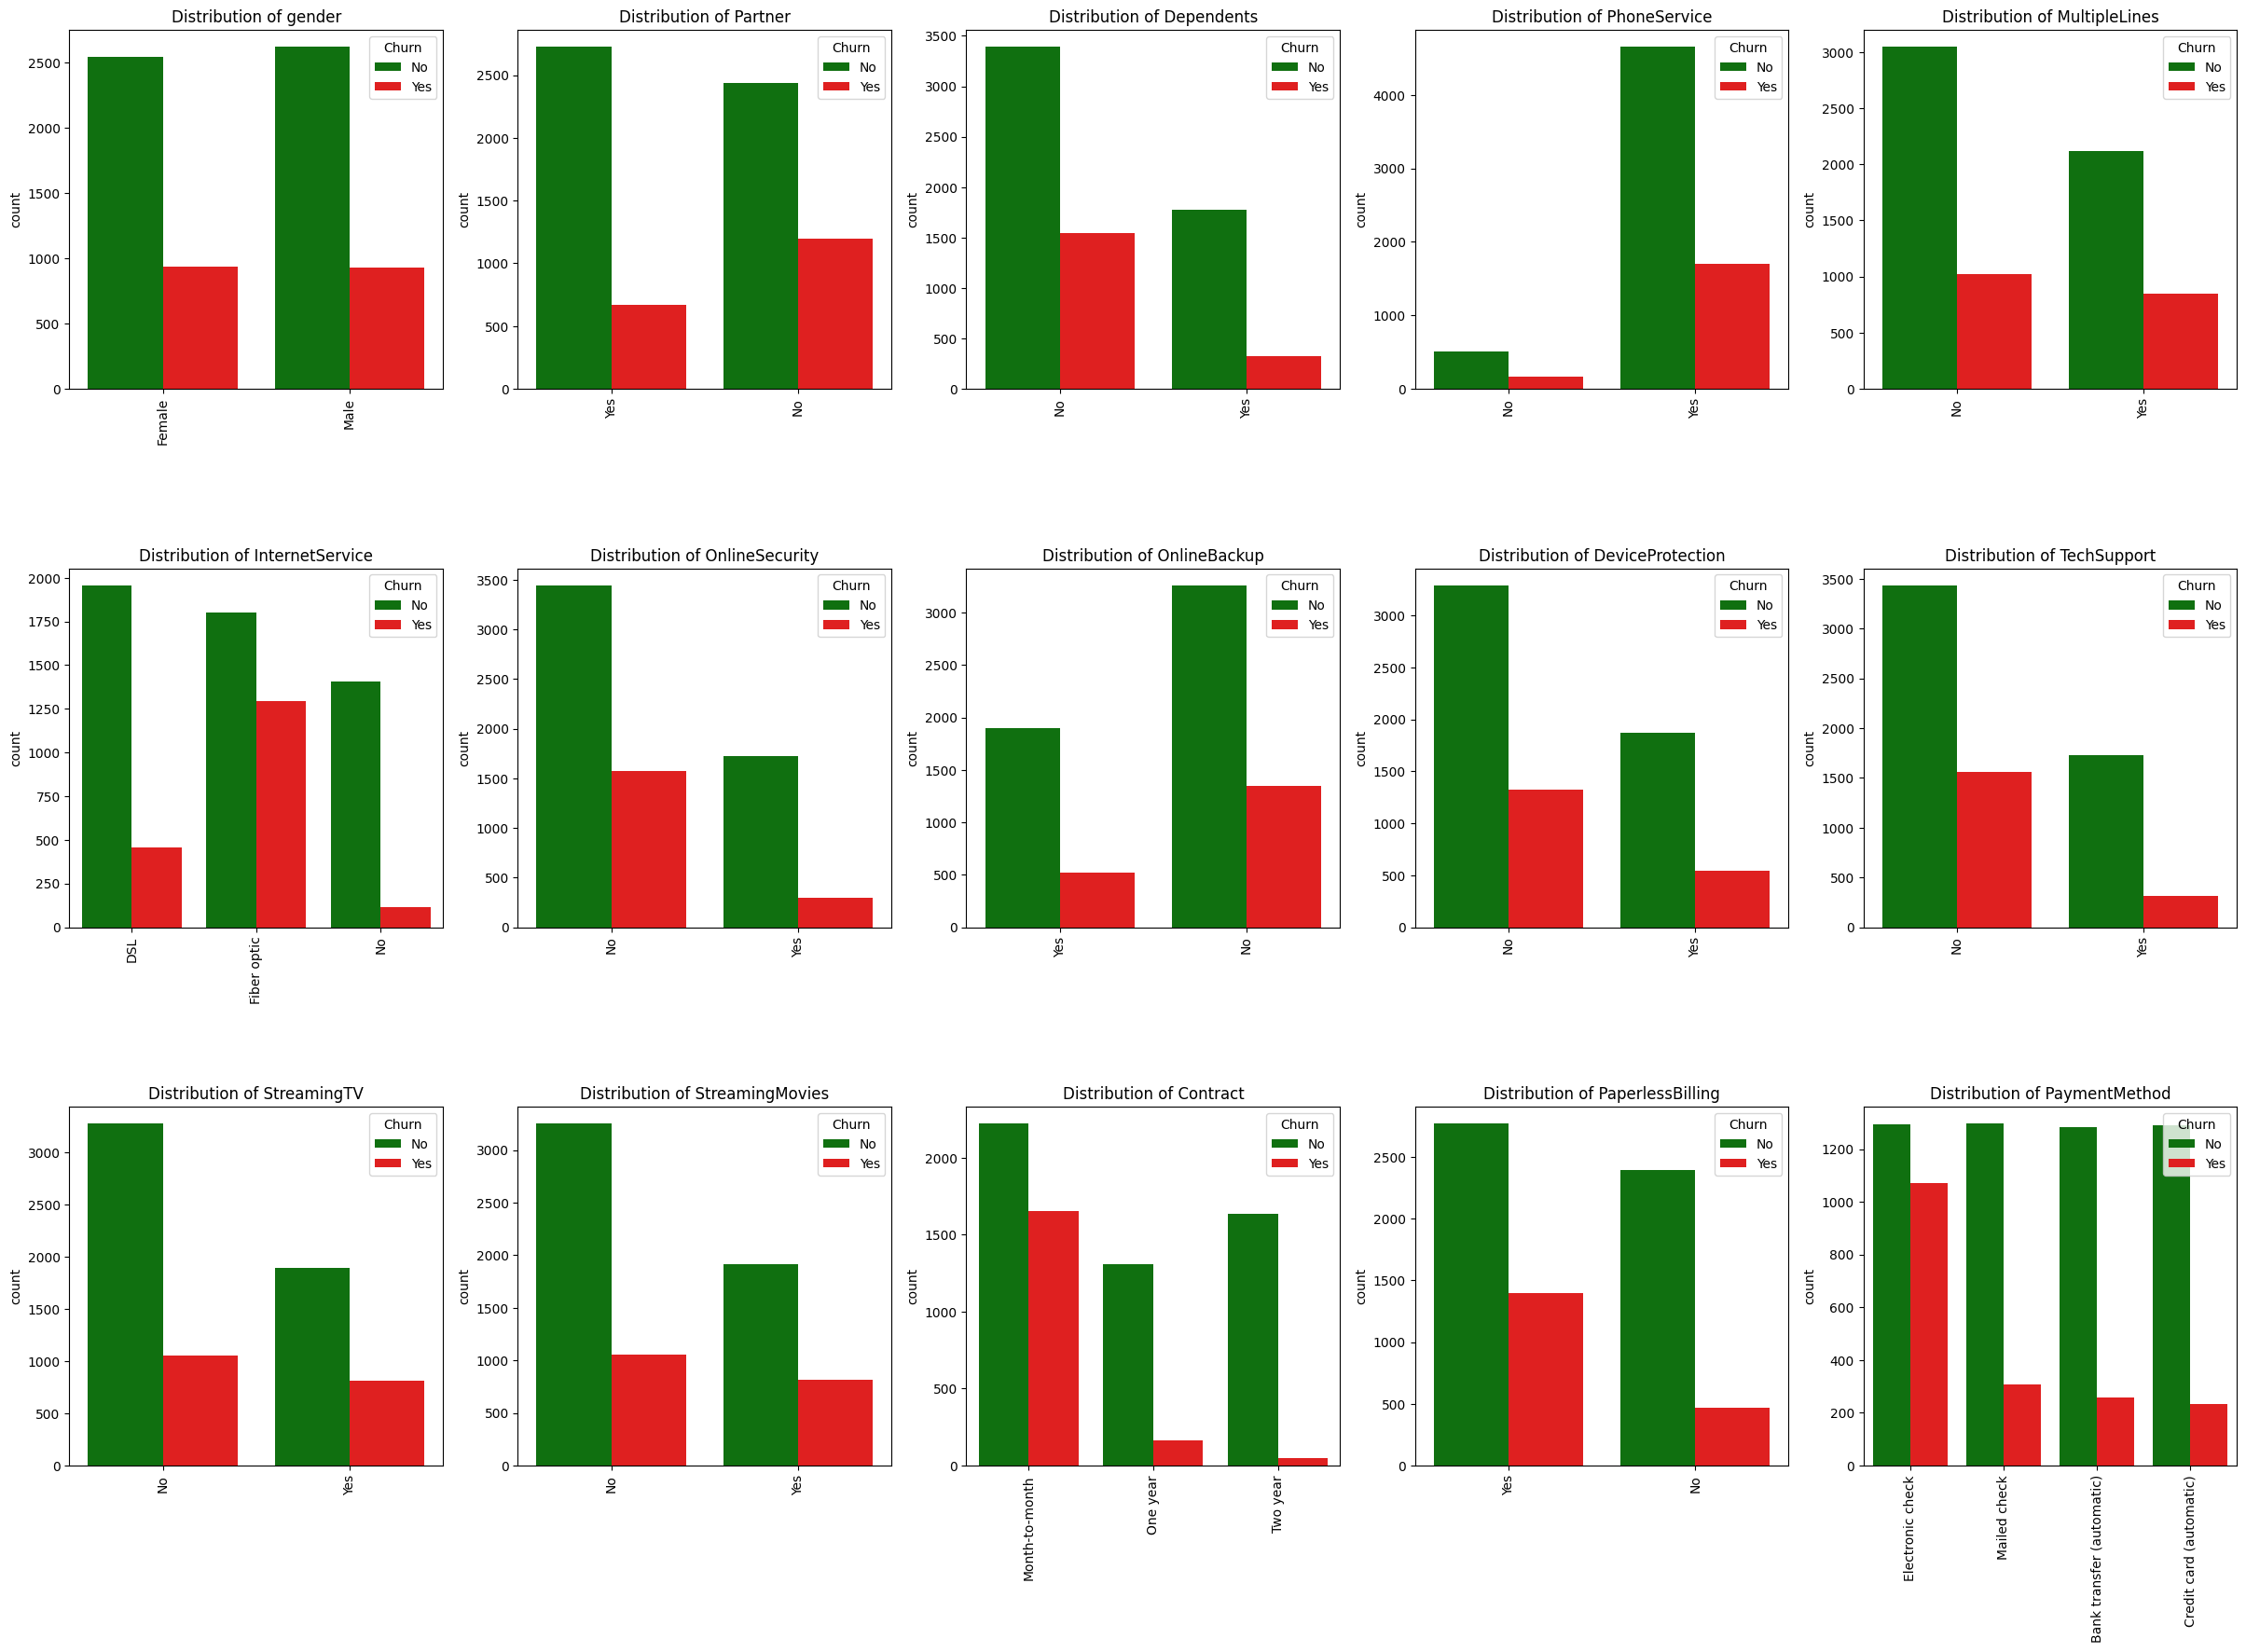

In [15]:
# Lets check if there is a real effect on churn by any of the categorical fields
categorical_features = data.select_dtypes(include=['object']).columns
categorical_df = data[categorical_features]

# Assuming df_categorical is your DataFrame containing categorical features
fig, axes = plt.subplots(
    nrows=3, 
    ncols=5, 
    figsize=(30, 20)
)
fig.subplots_adjust(hspace=0.5)

# Define colors for churn and non-churn bars
colors = {'Yes': 'red', 'No': 'green'}


for ax, column in zip(axes.flatten(), categorical_df.columns):
    # Bar plot
    sns.countplot(x=column, data=categorical_df, ax=ax, hue = 'Churn', palette=colors)
    ax.set_title(f'Distribution of {column}')
    ax.set_xlabel('')  # Hiding x-axis label
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)  # Rotating x-labels
    
    # # Pie chart as an inset
    # inset_ax = ax.inset_axes([0.6, 0.6, 0.35, 0.35])
    # categorical_df[column].value_counts().plot.pie(autopct='%1.1f%%', ax=inset_ax)
    # inset_ax.set_title(f'{column} Pie Chart')

plt.show()

<Axes: xlabel='Churn'>

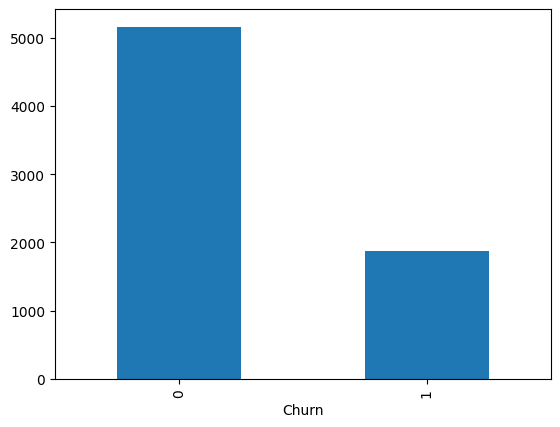

In [30]:
# First, there is a huge imbalance in target.

data['Churn'].value_counts().plot(kind = 'bar')

#### Handling Categorical Columns

In [16]:
# For the binary categorical columns, we will use label encoding to convert them to numerical.

for column in data:
    if data[column].dtype == 'object':
        print(f'{column}: {data[column].unique()}')


gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes']
OnlineBackup: ['Yes' 'No']
DeviceProtection: ['No' 'Yes']
TechSupport: ['No' 'Yes']
StreamingTV: ['No' 'Yes']
StreamingMovies: ['No' 'Yes']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


In [17]:
data['gender'] = data['gender'].map({'Male': 1, 'Female': 0})

In [18]:
# this scripts looks at all our categorical fields that contain either yes or no and replaces their value with 1 and 0 respectively
for column in data:
    if data[column].dtype == 'object' and set(data[column].unique()) == {'Yes', 'No'}:
        data[column] = data[column].map({'Yes': 1, 'No': 0})

In [19]:
for column in data:
    if data[column].dtype == 'object':
        print(f'{column}: {data[column].unique()}')

InternetService: ['DSL' 'Fiber optic' 'No']
Contract: ['Month-to-month' 'One year' 'Two year']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


In [20]:
# For the non-binary categorical columns, we will use pandas one-hot encoding to convert them to numerical.

# this script loops through all the remaining object fields in the dataframs and performs one hot encoding on them
for column in data:
    if data[column].dtype == 'object':
        data = pd.get_dummies(data = data, columns = [column])

In [21]:
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,0,0,1,0,...,True,False,False,True,False,False,False,False,True,False
1,1,0,0,0,34,1,0,1,0,1,...,True,False,False,False,True,False,False,False,False,True
2,1,0,0,0,2,1,0,1,1,0,...,True,False,False,True,False,False,False,False,False,True
3,1,0,0,0,45,0,0,1,0,1,...,True,False,False,False,True,False,True,False,False,False
4,0,0,0,0,2,1,0,0,0,0,...,False,True,False,True,False,False,False,False,True,False


#### Scaling Numerical Fields

In [22]:
# We want to scale our numerical fields such that they are within 0 and 1.
# Most of our fields are within this range except tenure, monthly charge and totalcharge
# so we would scale them

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

col = ['tenure', 'MonthlyCharges', 'TotalCharges']
data[col] = scaler.fit_transform(data[col])

data[col].describe()

,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000
mean,0.442560,0.463166,0.261309
std,0.345708,0.299363,0.261571
min,0.000000,0.000000,0.000000
25%,0.112676,0.172512,0.044155
50%,0.394366,0.518408,0.159090
75%,0.760563,0.712562,0.435719
max,1.000000,1.000000,1.000000


#### Train-Test Split

In [23]:
X = data.drop('Churn', axis = 1)
y = data['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape)
print(X_test.shape)

(5625, 26)
(1407, 26)


#### Creating model

In [29]:
# Now, let us define the models
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'svc': SVC()
}

# Also, we will initiate an empty dataframe to store our metrics
results_df = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

# Then, we will loop through the models to train, make predictions, and calculate the metrics
for model_name, model in models.items():
    # Training the model
    model.fit(X_train, y_train)

    # Predict
    y_pred = model.predict(X_test)

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)


    # Print out the metrics
    print(f"\nMetrics for {model_name}:")
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1:", f1)

    # create dictionary with results
    results_dict = {
        'Model': model_name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    }

    # Store metrics in results_df
    results_df = pd.concat([results_df, pd.DataFrame([results_dict])], ignore_index=True) 
    # as at new release of pandas, the append function has been removed

# # Print out results dataframe
# print("\nMetrics Comparison")
# print(results_df)
results_df


Metrics for Logistic Regression:
Accuracy: 0.7874911158493249
Precision: 0.6213592233009708
Recall: 0.5133689839572193
F1: 0.5622254758418741

Metrics for Random Forest:
Accuracy: 0.7782515991471215
Precision: 0.6019736842105263
Recall: 0.4893048128342246
F1: 0.5398230088495576

Metrics for Gradient Boosting:
Accuracy: 0.7938877043354655
Precision: 0.6448275862068965
Recall: 0.5
F1: 0.5632530120481927

Metrics for svc:
Accuracy: 0.7846481876332623
Precision: 0.6203389830508474
Recall: 0.4893048128342246
F1: 0.547085201793722


,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.787491,0.621359,0.513369,0.562225
1,Random Forest,0.778252,0.601974,0.489305,0.539823
2,Gradient Boosting,0.793888,0.644828,0.500000,0.563253
3,svc,0.784648,0.620339,0.489305,0.547085


<Axes: xlabel='Churn'>

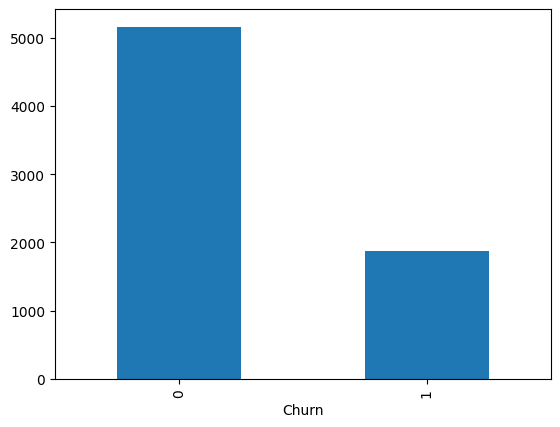

In [31]:
# First, there is a huge imbalance in target.

data['Churn'].value_counts().plot(kind = 'bar')

In [32]:
# we will use an oversampling technoque called SMOTE to address imbalance
from imblearn.over_sampling import SMOTE

# Applying SMOTE to training set
smote = SMOTE(random_state = 42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [33]:
# we will initiate an empty dataframe to store our metrics
results_df_smote = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

# Then, we will loop through the models to train, make predictions, and calculate the metrics
for model_name, model in models.items():
    # Training the model
    model.fit(X_train_smote, y_train_smote)

    # Predict
    y_pred = model.predict(X_test)

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)


    # Print out the metrics
    print(f"\nMetrics for {model_name}:")
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1:", f1)

    # create dictionary with results
    results_dict_smote = {
        'Model': model_name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    }

    # Store metrics in results_df
    results_df_smote = pd.concat([results_df_smote, pd.DataFrame([results_dict_smote])], ignore_index=True) 
    # as at new release of pandas, the append function has been removed

# # Print out results dataframe
# print("\nMetrics Comparison")
# print(results_df)
results_df_smote


Metrics for Logistic Regression:
Accuracy: 0.7547974413646056
Precision: 0.528046421663443
Recall: 0.7299465240641712
F1: 0.6127946127946128

Metrics for Random Forest:
Accuracy: 0.757640369580668
Precision: 0.5379310344827586
Recall: 0.6256684491978609
F1: 0.5784919653893695

Metrics for Gradient Boosting:
Accuracy: 0.7420042643923241
Precision: 0.5101663585951941
Recall: 0.7379679144385026
F1: 0.6032786885245901

Metrics for svc:
Accuracy: 0.7420042643923241
Precision: 0.510556621880998
Recall: 0.7112299465240641
F1: 0.594413407821229


,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.754797,0.528046,0.729947,0.612795
1,Random Forest,0.757640,0.537931,0.625668,0.578492
2,Gradient Boosting,0.742004,0.510166,0.737968,0.603279
3,svc,0.742004,0.510557,0.711230,0.594413


#### Logistic Regression

In [34]:
# Initialize Logistic Regression model
model_lr = LogisticRegression()

# Train the model
model_lr.fit(X_train_smote, y_train_smote)

# Make predictions on the testing set
y_pred_lr = model_lr.predict(X_test)

In [35]:
# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)


# Print out the metrics
print(f"\nMetrics for {model_name}:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1:", f1)


Metrics for svc:
Accuracy: 0.7420042643923241
Precision: 0.510556621880998
Recall: 0.7112299465240641
F1: 0.594413407821229


In [37]:
# Save the trained model
import joblib

joblib.dump(model_lr, 'churn_prediction_with_logistic_regression_model.joblib')

['churn_prediction_with_logistic_regression_model.joblib']